# Question 1


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


In [4]:
car_data = pd.read_csv("/Users/RVALENZUELA/Desktop/RVC 2020/RENE/X/MK Digital/Lets Up Grade/Datasets/Day 17/mtcars (1).csv")

In [12]:
print(car_data.head())

               model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


AxesSubplot(0.125,0.125;0.775x0.755)


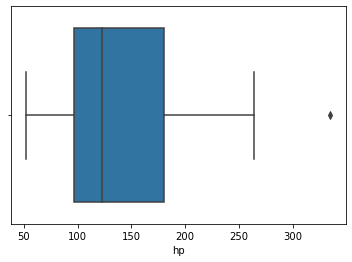

In [15]:
my_data = car_data['hp']
print(sns.boxplot(x=my_data))

In [19]:
mean = np.mean(my_data)
std_dev = np.std(my_data) 

In [43]:
print('mean of the data is', mean)
print('standard deviation of the data is', std_dev)

threshold = 2
outlier = [] 
for i in my_data: 
    z = (i-mean)/std_dev 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier)


mean of the data is 146.6875
standard deviation of the data is 67.48307079371833
outlier in dataset is [335]


# Question 2

In [13]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


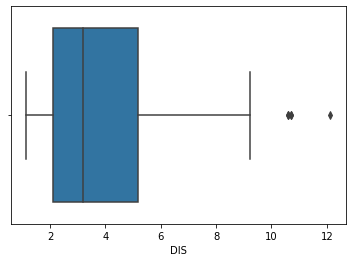

In [31]:
boston_data = boston_df['DIS']
sns.boxplot(x=boston_df['DIS'])
import matplotlib.pyplot as plt

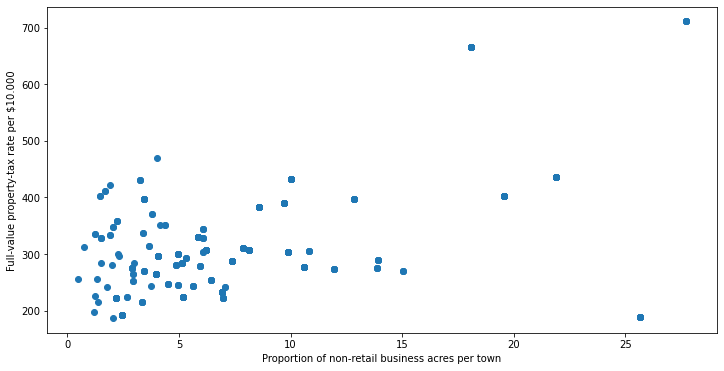

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10.000')
plt.show()

In [41]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1, Q3 = np.percentile(datacolumn, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [33]:
low_border, high_border = outlier_treatment(boston_data)
print(low_border,high_border)

-2.5322000000000005 9.820800000000002


In [37]:
print(boston_df[(boston_data > high_border)|(boston_data < low_border)])

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE      DIS  RAD    TAX  \
351  0.07950  60.0   1.69   0.0  0.411  6.579  35.9  10.7103  4.0  411.0   
352  0.07244  60.0   1.69   0.0  0.411  5.884  18.5  10.7103  4.0  411.0   
353  0.01709  90.0   2.02   0.0  0.410  6.728  36.1  12.1265  5.0  187.0   
354  0.04301  80.0   1.91   0.0  0.413  5.663  21.9  10.5857  4.0  334.0   
355  0.10659  80.0   1.91   0.0  0.413  5.936  19.5  10.5857  4.0  334.0   

     PTRATIO       B  LSTAT  
351     18.3  370.78   5.49  
352     18.3  392.33   7.79  
353     17.0  384.46   4.50  
354     22.0  382.80   8.05  
355     22.0  376.04   5.57  


In [38]:
print(boston_df[~((boston_data < low_border) | (boston_data > high_border))])

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1